# 9-7. 프로젝트: 인물 모드 문제점 찾기
만들면서 뭔가 이상한 점이 느껴지지 않으셨나요? 프로젝트를 통해 찾아봅시다.

우선 주요 라이브러리 버전을 확인해 볼까요?

In [1]:
from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


## Step 1. 인물모드 직접 해 보기
- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


### 사진 불러오기

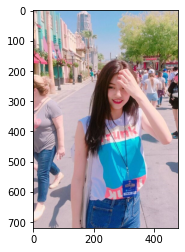

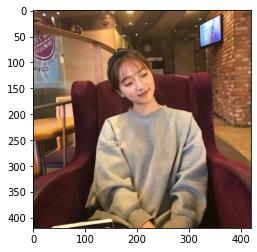

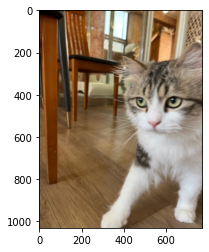

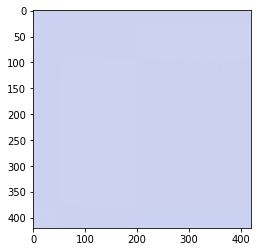

In [29]:
img_path_1 = os.getenv('HOME')+'/image_01.jpg'  
img_orig_1 = cv2.imread(img_path_1) 

img_path_2 = os.getenv('HOME')+'/image_02.jpg'  
img_orig_2 = cv2.imread(img_path_2) 

img_path_3 = os.getenv('HOME')+'/image_03.jpg'  
img_orig_3 = cv2.imread(img_path_3) 

img_path_4 = os.getenv('HOME')+'/image_04.png'  
img_orig_4 = cv2.imread(img_path_4)

img_orig_4 = cv2.resize(img_orig_4, (420, 420))

plt.imshow(cv2.cvtColor(img_orig_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_orig_2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_orig_3, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_orig_4, cv2.COLOR_BGR2RGB))
plt.show()

### 시맨틱 세그멘테이션

In [4]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fc27511a070>)

In [5]:
# PixelLib로 세그멘테이션 모델 생성
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 

In [6]:
# 모델에 이미지 입력
segvalues_1, output_1 = model.segmentAsPascalvoc(img_path_1)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_path_2)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_path_3)

In [7]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

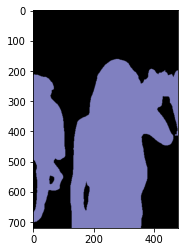

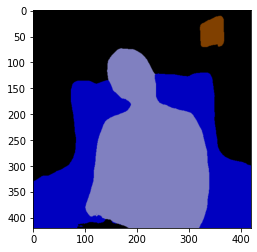

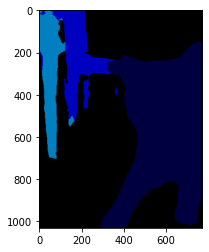

In [8]:
plt.imshow(output_1)
plt.show()

plt.imshow(output_2)
plt.show()

plt.imshow(output_3)
plt.show()

In [9]:
# 각 사진의 라벨 확인
print('Image_1')
for class_id in segvalues_1['class_ids']:
    print(LABEL_NAMES[class_id])
print('-----------------------')
print('Image_2')
for class_id in segvalues_2['class_ids']:
    print(LABEL_NAMES[class_id])
print('-----------------------')
print('Image_3')
for class_id in segvalues_3['class_ids']:
    print(LABEL_NAMES[class_id])
print('-----------------------')

Image_1
background
person
-----------------------
Image_2
background
chair
person
tv
-----------------------
Image_3
background
cat
chair
diningtable
-----------------------


In [10]:
# 사람의 마스크 만들기
colormap_1 = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap_1[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3



colormap_2 = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap_2[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap_3 = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap_3[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

seg_color_1 = (128,128,192) # 사람(15번 라벨)
seg_color_2 = (0,0,64) # 고양이(8번 라벨)

(720, 480)


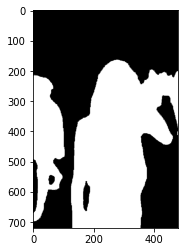

(420, 420)


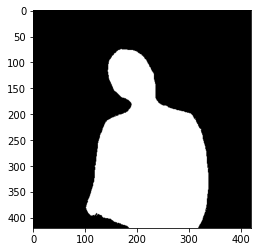

(1031, 773)


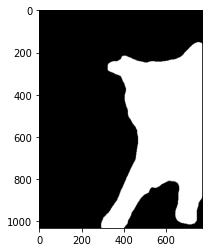

In [11]:
seg_map_1 = np.all(output_1==seg_color_1, axis=-1) 
print(seg_map_1.shape) 
plt.imshow(seg_map_1, cmap='gray')
plt.show()

seg_map_2 = np.all(output_2==seg_color_1, axis=-1) 
print(seg_map_2.shape) 
plt.imshow(seg_map_2, cmap='gray')
plt.show()

seg_map_3 = np.all(output_3==seg_color_2, axis=-1) 
print(seg_map_3.shape) 
plt.imshow(seg_map_3, cmap='gray')
plt.show()

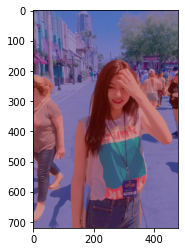

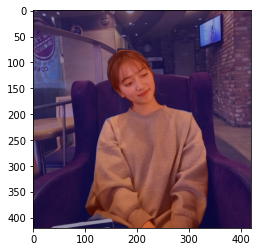

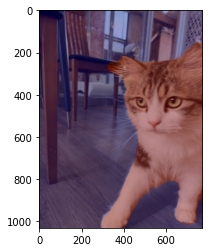

In [12]:
# 세그멘테이션 결과
img_show_1 = img_orig_1.copy()
img_mask_1 = seg_map_1.astype(np.uint8) * 255
color_mask_1 = cv2.applyColorMap(img_mask_1, cv2.COLORMAP_JET)

img_show_1 = cv2.addWeighted(img_show_1, 0.6, color_mask_1, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_1, cv2.COLOR_BGR2RGB))
plt.show()


img_show_2 = img_orig_2.copy()
img_mask_2 = seg_map_2.astype(np.uint8) * 255
color_mask_2 = cv2.applyColorMap(img_mask_2, cv2.COLORMAP_JET)

img_show_2 = cv2.addWeighted(img_show_2, 0.6, color_mask_2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB))
plt.show()

img_show_3 = img_orig_3.copy()
img_mask_3 = seg_map_3.astype(np.uint8) * 255
color_mask_3 = cv2.applyColorMap(img_mask_3, cv2.COLORMAP_JET)

img_show_3 = cv2.addWeighted(img_show_3, 0.6, color_mask_3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
plt.show()

### 셸로우 포커스
- 첫 번째 사진(사람)과 세 번째 사진(고양이)에 대한 셸로우 포커스 작업을 수행해 보았다.

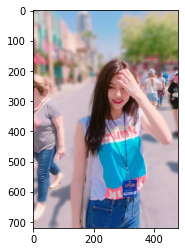

In [13]:
img_orig_blur_1 = cv2.blur(img_orig_1, (13,13))

img_mask_color_1 = cv2.cvtColor(img_mask_1, cv2.COLOR_GRAY2BGR)
img_bg_mask_1 = cv2.bitwise_not(img_mask_color_1)

img_bg_blur_1 = cv2.bitwise_and(img_orig_blur_1, img_bg_mask_1)

img_concat_1 = np.where(img_mask_color_1==255, img_orig_1, img_bg_blur_1)

plt.imshow(cv2.cvtColor(img_concat_1, cv2.COLOR_BGR2RGB))
plt.show()

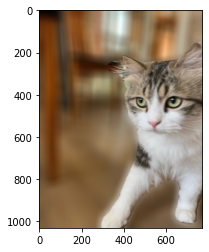

In [32]:
img_orig_blur_3 = cv2.blur(img_orig_3, (55,55))

img_mask_color_3 = cv2.cvtColor(img_mask_3, cv2.COLOR_GRAY2BGR)
img_bg_mask_3 = cv2.bitwise_not(img_mask_color_3)

img_bg_blur_3 = cv2.bitwise_and(img_orig_blur_3, img_bg_mask_3)

img_concat_3 = np.where(img_mask_color_3==255, img_orig_3, img_bg_blur_3)

plt.imshow(cv2.cvtColor(img_concat_3, cv2.COLOR_BGR2RGB))
plt.show()

### 크로마 키
- 두 번째 사진에 대하여 크로마 키를 적용해 보았다.

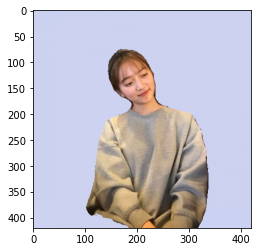

In [30]:
img_mask_color_2 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)
img_bg_mask_2 = cv2.bitwise_not(img_mask_color_2)

img_concat_2 = np.where(img_mask_color_2==255, img_orig_2, img_orig_4)

plt.imshow(cv2.cvtColor(img_concat_2, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기
그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.

아래 사진에도 문제점이 몇 가지 있었습니다. 예를 들어 뒤에 걸린 옷이 인물 영역에 포함되어 blur되지 않고 나온다던가 하는 경우입니다. ㅠㅠ 그 외 다른 문제들이 눈에 띄시나요? 아래 사진에는 이상한 점이 최소 2개 이상 더 있습니다. 어떤 문제가 있는지 찾아서 아래 사진처럼 표시해 봅시다.

추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

- 제가 진행해본 사진 3가지 중 2번째와 3번째 사진에 대한 결과는 예측한 결과를 얻을 수 있었지만 첫 번째 사진은 다소 아쉬운 점을 발견할 수 있었습니다.
- 메인이 되는 사람 이외에 다른 사람이 존재한다면 결과가 어떻게 변할지 궁금해서 선택한 사진인데 메인이 되는 사람에 대한 셸로우 포커싱은 성공하였지만 주변의 행인에 대한 결과는 의문이 남습니다. 마스킹 상으로는 메인이 되는 사람 뿐만 아니라 주변 행인 까지도 사람으로 인식하는 것을 확인할 수 있었으나 셸로우 포커싱 작업 후에는 주변의 행인의 경우 블러 처리 된 것을 확인할 수 있었습니다.

## Step 3. 해결 방법을 제안해 보기
아주 간단히 멋진 카메라 앱 서비스를 만들어 출시할 수 있을 것 같았지만, 지금 같은 완성도로는 어림도 없습니다. 소비자들의 눈높이는 그리 호락호락하지 않고, 엔지니어인 여러분들은 답을 찾아내야 합니다.

생각해 볼 만한 주제를 아래에 몇 가지 제시해 봅니다. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.
단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

#### 세그멘테이션의 한계
Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인입니다. 피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘듭니다.

#### 피사계 심도 이해하기
우선 피사계심도의 개념부터 명확히 이해해 봅시다.

- 아웃 포커싱 하는 법
    - https://m.blog.naver.com/typs6301/222172333739

- 얕은 피사계 심도 촬영의 이해
    - https://www.adobe.com/kr/creativecloud/photography/discover/shallow-depth-of-field.html
    
#### 3D Camera 활용하기

이미지를 2D 방식으로 받아들이는 한계를 넘어 3D로 인식하려는 시도는 꽤 오래전부터 계속되어 왔습니다. 기술도 이제는 상당한 수준에 이르렀는데요. 크게는 스테레오 비전, ToF 방식 등이 자주 사용됩니다. 하드웨어 이미지 센서를 통한 3D 이미징 기술이 많이 발전되었는데요. 아래 참고 자료를 통해 최신 기술을 살펴봐도 좋습니다.

- 3D 이미지 센서
    - https://news.skhynix.co.kr/post/next-gen-3d

#### 소프트웨어 기술 활용하기
하드웨어 개발과 생산에는 비용이 많이 들기 때문에 제한된 하드웨어를 이용하면서 소프트웨어로 그 한계를 극복하려는 노력도 많습니다. 구글의 struct2Depth가 대표적인 예일 것 같습니다.

- https://sites.google.com/view/struct2depth

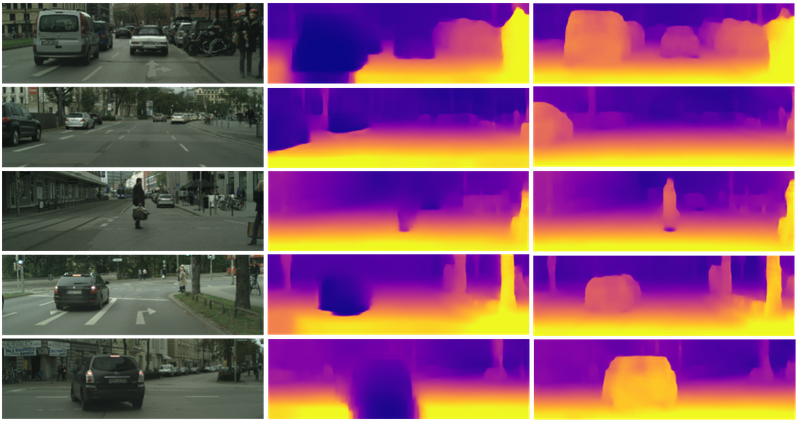

#### 다른 기술과 융합해 보기
구글 pixel4에는 IR(적외선) 카메라가 달려있는데요. 물체의 온도를 측정하는 IR 카메라와 3D 이미지는 크게 관련이 없을 것 같지만, 이를 통해 보다 멋진 3d depth sensing이 가능하다는군요.

uDepth: Real-time 3D Depth Sensing on the Pixel 4

- https://ai.googleblog.com/2020/04/udepth-real-time-3d-depth-sensing-on.html

이렇게 카메라와 무관한 다른 기술과 융합하는 것도 좋은 해결책이 될 수 있습니다. 한 번 고민해 보세요!

이 외에도 다른 방식으로 접근해도 좋습니다. 엔지니어로서 본인이 선택한 솔루션을 잘 설명해 주세요. 가능하다면 순서도(Flow Chart)를 활용하면 좋습니다. 멋진 아이디어를 기대하겠습니다!!

- 제가 생각한 결과의 아쉬운 점은 세그멘테이션의 완벽하지 못하기 때문에 발생하였다고 생각합니다. 그리고 세그멘테이션에 대한 결과들을 찾아보면서 의도하지 않은 전혀 다른 물체가 같은 물체로 인식되는 경우가 많은데 이를 어느정도 보완하기 위한 기술에 대해 생각해 보았습니다.
- 예전 처음 영상 처리 프로젝트를 진행할 때 다시점 영상의 효율성 개선을 위해 Global View와 Depth를 활용한 적이 있습니다. 당시 목적은 Depth 영상을 활용해서 다시점 영상의 동일한 물체를 제거하여 효율성을 높이고자 하였습니다.(중복된 부분을 제거) 동일한 물체를 판별하기 위해 Depth 영상을 활용하였는데 다시점에서 촬영환 Depth 영상을 이어서 스펙트럼화 시키고 특정 조건에 맞을 경우 동일한 물체로 인식하여 라벨을 부여한 후 영상에서 제거하는 과정을 거쳐 효율성을 향상시켰습니다.
- 세그멘테이션 기술 역시 일부 특정한 상황에서 구분을 못하는 상황이 발생한다고 생각하여 이러한 다시점의 Depth 영상을 이어붙이면 정확도를 높일 수 있을 것이라 예측하였습니다.